#Procesamiento y normalizacion de los datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv("../Datasets/MarathonData.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [10]:
data.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [7]:
data.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [17]:
data[['CrossTraining']].value_counts()

CrossTraining
ciclista 3h      5
ciclista 5h      4
ciclista 4h      2
ciclista 13h     1
ciclista 1h      1
dtype: int64

In [21]:
data['Wall21']=pd.to_numeric(data['Wall21'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


In [ ]:
data = data.drop(columns = ['id','Name','Marathon','CATEGORY'])

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     object 
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     int64  
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [32]:
data.isna().sum() #isna() = isnull()

Category         6
km4week          0
sp4week          0
CrossTraining    0
Wall21           6
MarathonTime     0
dtype: int64

In [35]:
data['CrossTraining'] = data['CrossTraining'].fillna(0)

In [36]:
data=data.dropna(how='any')

Reemplazar los datos categoricos restantes con numerizacion

In [39]:
values_cross = {"CrossTraining": {'ciclista 1h':1,'ciclista 3h':3,'ciclista 4h':4,'ciclista 5h':5,'ciclista 13h':13}}
data.replace(values_cross, inplace=True)
data['CrossTraining'].value_counts()

0     69
3      5
5      3
4      2
1      1
13     1
Name: CrossTraining, dtype: int64

In [45]:
values_catg = {"Category": {'MAM':1,'M45':2,'M40':3,'M50':4,'WAM':5,'M55':6}}
data.replace(values_catg, inplace=True)
data['Category'].value_counts() #data['whateverrrrrr'].unique()

1    40
2    15
3    15
4     4
5     4
6     3
Name: Category, dtype: int64

#Visualizacion de los datos

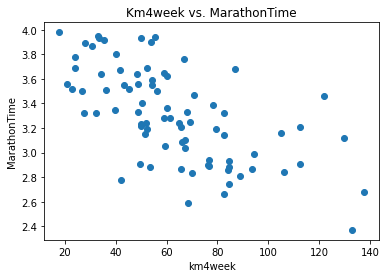

In [46]:
import matplotlib.pyplot as plt
plt.scatter(x=data['km4week'],y=data['MarathonTime'])
plt.title('Km4week vs. MarathonTime')
plt.xlabel('km4week')
plt.ylabel('MarathonTime')
plt.show()

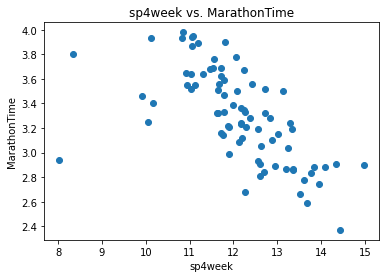

In [53]:
data = data.query('sp4week<2000')
plt.scatter(x=data['sp4week'],y=data['MarathonTime'])
plt.title('sp4week vs. MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('MarathonTime')
plt.show()

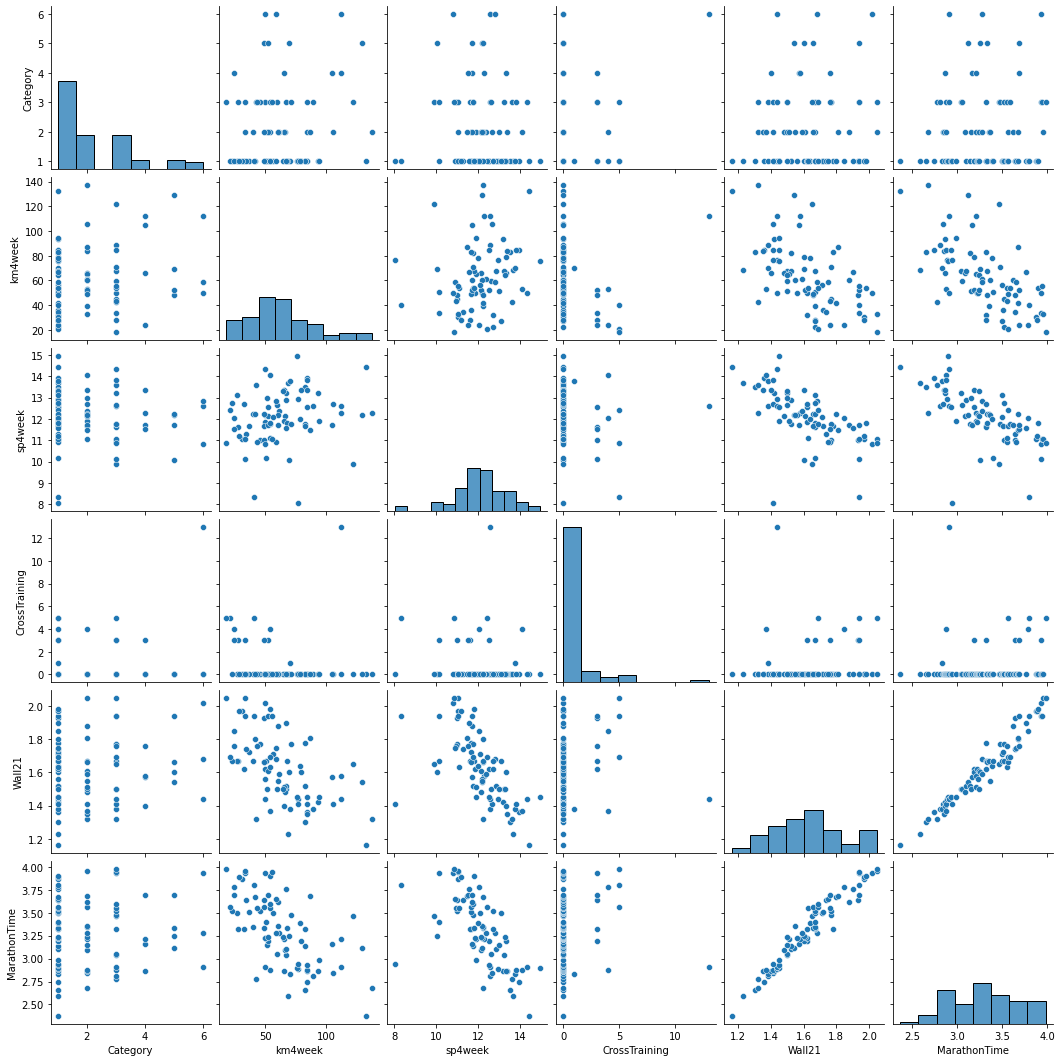

In [61]:
import seaborn as sns
sns.pairplot(data)

#Separacion de entrenamiento

In [84]:
data_train = data.sample(frac=0.8,random_state=5)
data_test = data.drop(data_train.index)
data_train.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
42,1,82.7,11.647887,0,1.78,3.32
26,5,129.6,12.188088,0,1.54,3.12
10,1,93.5,13.200000,0,1.42,2.87
63,1,20.7,12.420000,5,1.69,3.56
67,1,34.3,11.307692,0,1.74,3.64


In [85]:
tags_train = data_train.pop('MarathonTime')
tags_test = data_test.pop('MarathonTime')
tags_train

42    3.32
26    3.12
10    2.87
63    3.56
67    3.64
      ... 
61    3.55
18    2.93
86    3.98
22    3.05
20    2.99
Name: MarathonTime, Length: 64, dtype: float64

In [86]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(data_train,tags_train)

LinearRegression()

In [87]:
predicciones = modelo.predict(data_test)
predicciones

array([2.87785847, 2.86321005, 2.95458345, 2.75203953, 3.1057609 ,
       3.22976563, 3.36051361, 3.32490596, 3.53011787, 3.74516584,
       3.84026888, 3.64177655, 3.96336064, 3.96462767, 3.8788813 ,
       4.08133885])

In [88]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(tags_test,predicciones))
print("Percentage of error: %f" % (error*100))

Percentage of error: 9.024192


In [89]:
nuevo_corredor = pd.DataFrame(np.array([[1,400,20,0,1.4]]),columns=['Category','km4week','sp4week','CrossTraining','Wall21'])
nuevo_corredor

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [90]:
modelo.predict(nuevo_corredor)

array([2.25911179])